In [1]:
# Mod 15 CS II

In [2]:
#Importing libraries
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1) Read the data file and check for any missing values

#decimal : set character used for decimal numbers
data = pd.read_csv("Project_Data_1.csv", index_col=0, decimal=",")
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0


In [4]:
# 2) Change the headers to country and year accordingly
data = data.rename_axis('Country')
data.columns.names = ["Year"]
data

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126.0,352.0,64.0,174.0,172.0,93.0,123,213,107,105,103,13,275,147,63.0,57.0,60.0,25.0
West Bank and Gaza,55.0,54.0,54.0,52.0,52.0,50.0,49,46,44,42,40,39,37,36,35.0,33.0,32.0,31.0
Yemen,265.0,261.0,263.0,253.0,250.0,244.0,233,207,194,175,164,154,149,146,138.0,137.0,135.0,130.0


In [5]:
# 3) Cleanse the data if required and remove null or blank values
# check null, nan values (in terms of percentages) for each variable in the dataframe
data.isna().sum()/len(data)*100

Year
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
dtype: float64

In [6]:
data.isnull().sum()/len(data)*100

Year
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
dtype: float64

In [7]:
# No Null or NaN values have been observed.

In [8]:
# Applying Kmeans Algorithm
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(data)
# clusters centers
print(kmeans.cluster_centers_)

[[611.64858824 603.52976471 649.29411765 636.35294118 624.41176471
  615.64705882 597.         601.41176471 579.35294118 588.70588235
  603.64705882 621.11764706 588.47058824 588.11764706 581.52941176
  585.52941176 582.47058824 576.94117647]
 [ 71.03546099  71.03546099  68.24113475  68.09219858  66.53900709
   66.88652482  63.67375887  66.68085106  64.21276596  62.10638298
   55.54609929  53.60992908  57.85815603  50.62411348  49.90070922
   47.90780142  47.07801418  45.36170213]
 [364.27520408 365.5607551  363.07067347 361.49881633 360.33497959
  359.74246939 365.40816327 364.         366.69387755 379.44897959
  380.67346939 381.34693878 387.71428571 395.51020408 368.30681633
  360.83767347 354.18557143 353.36946939]]


In [9]:
# 6) Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.

# data splitting for clustering
data_for_decomposition = data.iloc[:, 0:]
data_for_decomposition.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0


In [10]:
# PCA for dimension reduction
model_pca = PCA(n_components=2)
pca_data = model_pca.fit(data_for_decomposition).transform(data_for_decomposition)

In [11]:
# Variance Ratio
print(f"Variance Ratio: {model_pca.explained_variance_ratio_}")

Variance Ratio: [0.89661399 0.0604591 ]


In [12]:
new_data = pd.DataFrame(pca_data, columns=["pca_1", "pca_2"])
new_data.index = data.index
new_data.head()

,pca_1,pca_2
Country,,
Afghanistan,744.815213,-235.636419
Albania,-595.865592,6.105249
Algeria,-551.303760,45.952015
American Samoa,-700.700584,8.865202
Andorra,-645.423819,1.536970


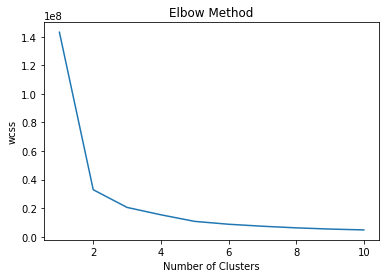

In [13]:
# 7) Plot elbow chart or scree plot to find out optimal number of clusters.

# elbow method to find the number of clusers
wcss = []  # wcss - within cluster squared sum of inertia

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=10)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [14]:
# Elbow method indicates the number of clusters to be 3

In [15]:
# 8) Then try to apply K means, Hierarchical clustering and showcase the results.

# Applying Kmeans Algorithm
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(new_data)
# clusters centers
print(kmeans.cluster_centers_)

[[1801.3536003   -52.48773448]
 [-499.05863515   -5.74958477]
 [ 811.10727247   34.75475384]]


In [16]:
# Adding cluster column
new_data["cluster"] = kmeans.labels_
new_data.head()

,pca_1,pca_2,cluster
Country,,,
Afghanistan,744.815213,-235.636419,2
Albania,-595.865592,6.105249,1
Algeria,-551.303760,45.952015,1
American Samoa,-700.700584,8.865202,1
Andorra,-645.423819,1.536970,1


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


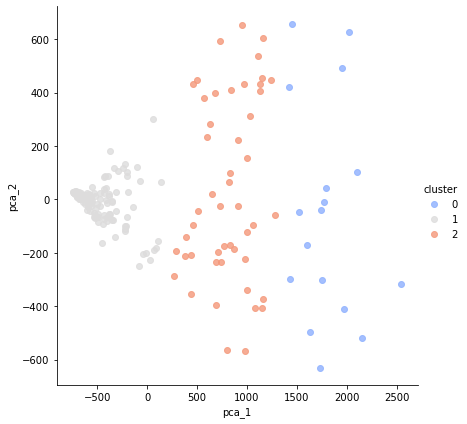

In [17]:
#  plotting the cluster data
sns.lmplot('pca_1', 'pca_2', data=new_data, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


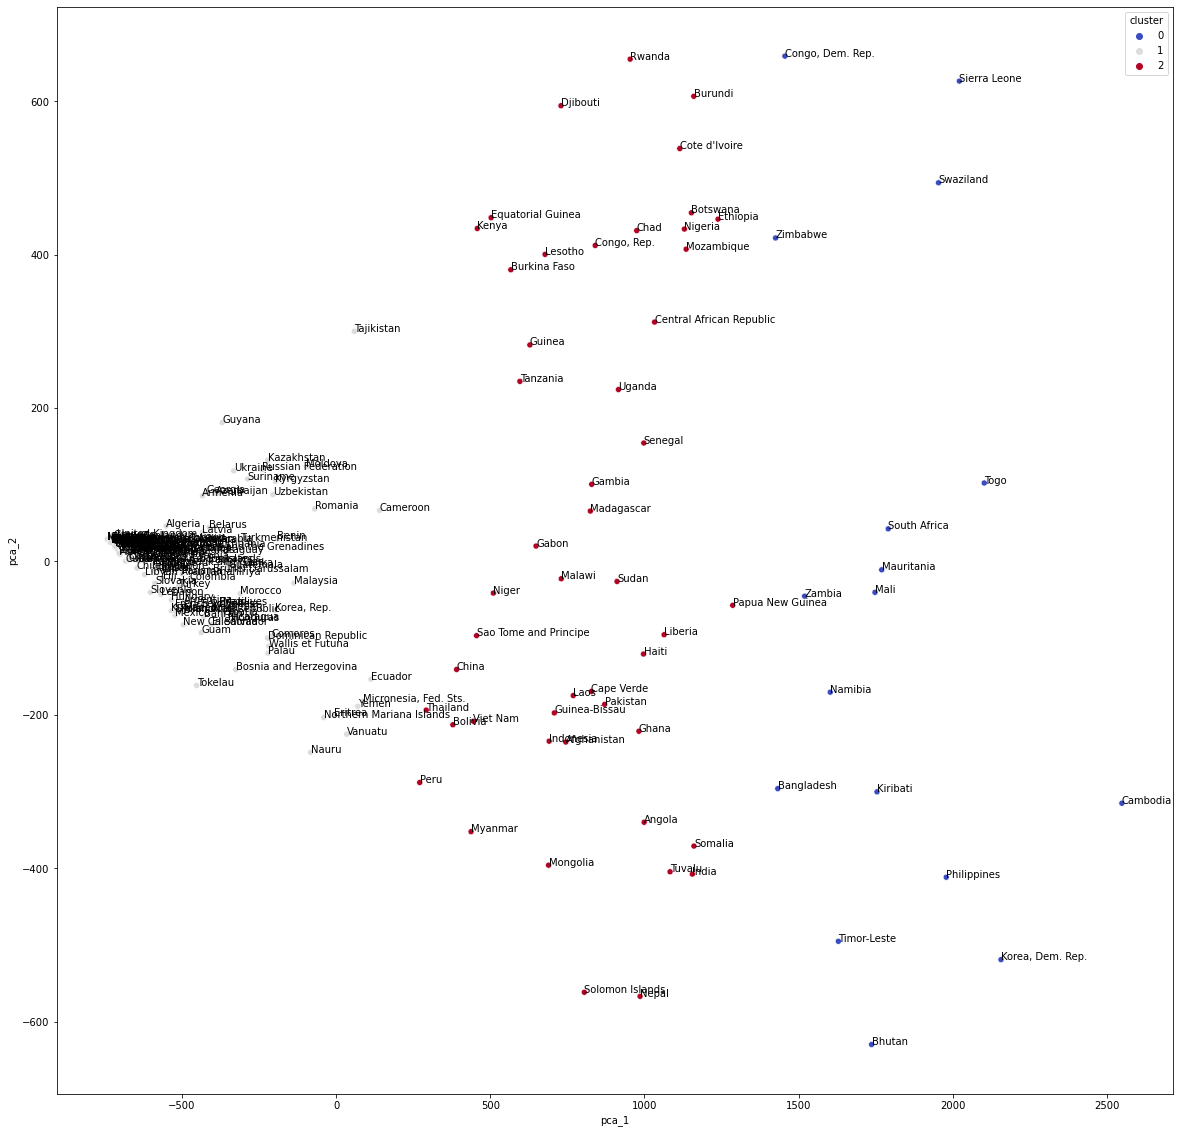

In [18]:
#  plotting the cluster data
ax =plt.figure(figsize=(20,20))

ax = sns.scatterplot('pca_1', 'pca_2', data=new_data, hue='cluster',
           palette='coolwarm')

for i, country in enumerate(data.index):
    ax.annotate(country, (new_data.iloc[i].pca_1, new_data.iloc[i].pca_2))

In [19]:
# adding cluster column to original data
data["cluster"] = kmeans.labels_
data

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0,2
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0,1
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0,1
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0,1
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126.0,352.0,64.0,174.0,172.0,93.0,123,213,107,105,103,13,275,147,63.0,57.0,60.0,25.0,1
West Bank and Gaza,55.0,54.0,54.0,52.0,52.0,50.0,49,46,44,42,40,39,37,36,35.0,33.0,32.0,31.0,1
Yemen,265.0,261.0,263.0,253.0,250.0,244.0,233,207,194,175,164,154,149,146,138.0,137.0,135.0,130.0,1


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cluster', ylabel='count'>

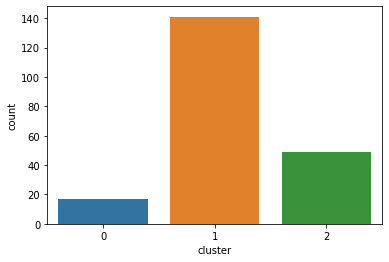

In [20]:
#Count of countries in each cluster
sns.countplot(data["cluster"], label="Count")

In [21]:
cluster_0 = data.query("cluster==0")
print(cluster_0)

Year                 1990     1991   1992   1993   1994   1995  1996  1997  \
Country                                                                      
Bangladesh        639.000  623.000  608.0  594.0  579.0  576.0   550   535   
Bhutan            924.000  862.000  804.0  750.0  699.0  651.0   620   597   
Cambodia          928.000  905.000  881.0  858.0  836.0  811.0   810   789   
Korea, Dem. Rep.  841.000  828.000  815.0  802.0  788.0  775.0   775   775   
Congo, Dem. Rep.  275.000  306.000  327.0  352.0  376.0  411.0   420   466   
Kiribati            1.026    1.006  986.0  966.0  947.0  928.0   910   853   
Mali              640.000  631.000  621.0  609.0  597.0  583.0   573   566   
Mauritania        585.000  587.000  590.0  592.0  594.0  595.0   622   615   
Namibia           650.000  685.000  687.0  683.0  671.0  658.0   387   395   
Philippines       799.000  783.000  766.0  750.0  735.0  719.0   705   689   
Sierra Leone      465.000  479.000  492.0  504.0  517.0  534.0  

In [22]:
cluster_1 = data.query("cluster==1")
cluster_1

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country,,,,,,,,,,,,,,,,,,,
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0,1
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0,1
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0,1
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0,1
Anguilla,38.0,38.0,37.0,37.0,36.0,35.0,35,36,36,36,35,35,35,35,35.0,34.0,34.0,34.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,278.0,268.0,259.0,250.0,242.0,234.0,226,218,211,159,143,128,149,128,118.0,131.0,104.0,102.0,1
Venezuela,46.0,45.0,44.0,43.0,42.0,42.0,41,41,40,39,39,41,41,39,38.0,38.0,38.0,39.0,1
Wallis et Futuna,126.0,352.0,64.0,174.0,172.0,93.0,123,213,107,105,103,13,275,147,63.0,57.0,60.0,25.0,1


In [23]:
cluster_2 = data.query("cluster==2") 
cluster_2

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,436.000,429.000,422.000,415.000,407.000,397.000,397,387,374,373,346,326,304,308,283.000,267.000,251.000,238.000,2
Angola,514.000,514.000,513.000,512.000,510.000,508.000,512,363,414,384,530,335,307,281,318.000,331.000,302.000,294.000,2
Bolivia,377.000,362.000,347.000,333.000,320.000,306.000,271,264,254,248,238,229,223,218,211.000,205.000,202.000,198.000,2
Botswana,344.000,355.000,351.000,349.000,347.000,349.000,336,349,371,413,445,497,535,586,598.000,599.000,621.000,622.000,2
Burkina Faso,179.000,196.000,208.000,221.000,233.000,246.000,251,271,286,308,338,368,398,419,426.000,421.000,411.000,403.000,2
Burundi,288.000,302.000,292.000,293.000,305.000,322.000,339,346,424,412,455,522,581,619,639.000,654.000,657.000,647.000,2
Cape Verde,449.000,438.000,428.000,418.000,408.000,398.000,394,391,387,384,380,283,374,370,367.000,278.000,285.000,280.000,2
Central African Republic,318.000,336.000,342.000,350.000,356.000,365.000,270,395,419,449,485,495,468,566,574.000,507.000,437.000,425.000,2
Chad,251.000,272.000,282.000,294.000,304.000,315.000,354,408,433,390,420,450,502,573,548.000,518.000,505.000,497.000,2


In [24]:
# export new_data for analysing
new_data.sort_values(["cluster", "pca_1", "pca_2"])
new_data.to_csv("output.csv", index=True)

In [25]:
print(new_data.sort_values(["cluster", "pca_1", "pca_2"]))

                        pca_1       pca_2  cluster
Country                                           
Zimbabwe          1425.223681  421.564934        0
Bangladesh        1432.427289 -296.382958        0
Congo, Dem. Rep.  1455.482723  658.651353        0
Zambia            1519.387555  -45.410960        0
Namibia           1602.589797 -170.613582        0
...                       ...         ...      ...
India             1155.340108 -407.791706        2
Burundi           1159.993082  606.260743        2
Somalia           1160.456877 -371.242272        2
Ethiopia          1238.598558  446.094084        2
Papua New Guinea  1286.269388  -57.370262        2

[207 rows x 3 columns]


In [26]:
# 10) Then see which countries are consistent and which are largest importers of the good based on scale and position of cluster.
# Largest Importer and constantly increasing
data.loc["Sierra Leone"]
X = data.loc["Sierra Leone"].index[0:18]
Y = data.loc["Sierra Leone"].values[0:18]

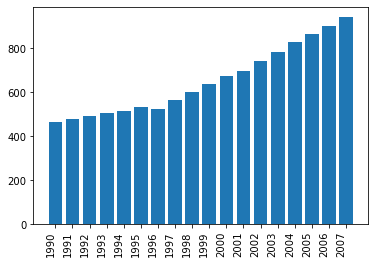

In [27]:
plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  # Rotate Axis Labels

plt.show()

In [28]:
# most consistent
data.loc["Monaco"]
X = data.loc["Monaco"].index[0:18]
Y = data.loc["Monaco"].values[0:18]

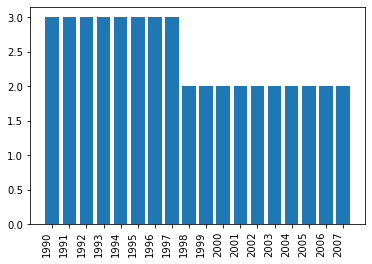

In [29]:
plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  # Rotate Axis Labels

plt.show()